In [89]:
import pandas as pd
import math
import numpy as np
import pylab
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy


In [90]:
from matplotlib import pyplot as plt

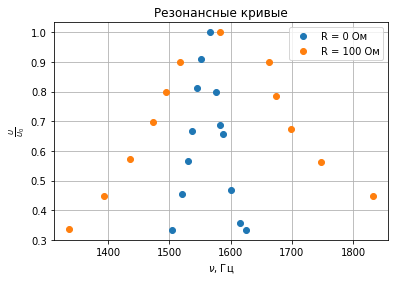

<Figure size 432x288 with 0 Axes>

In [91]:
x = np.array([1504, 1521, 1530, 1537, 1545, 1551, 1566, 1577, 1583, 1588, 1601, 1615, 1625], dtype=np.float64)
y = np.array([3.0, 4.1, 5.1, 6.0, 7.3, 8.2, 9.0, 7.2, 6.2, 5.9, 4.2, 3.2, 3.0],dtype=np.float64)
for i in range(len(y)):
    y[i] /= 9
plt.plot(x, y, 'o', label='R = 0 Ом')
plt.title('Резонансные кривые')
plt.xlabel(r'$\nu$' + ', Гц')
plt.ylabel(r'$\frac{U}{U_0}$')

x1 = np.array([1336, 1393, 1436, 1474, 1495, 1517, 1583, 1662, 1675, 1698, 1748, 1833], dtype=np.float64) #1675
y1 = np.array([3, 4, 5.1, 6.2, 7.1, 8.0, 8.9, 8, 7, 6, 5, 4],dtype=np.float64)
for i in range(len(y1)):
    y1[i] /= 8.9
plt.plot(x1, y1, 'o', label='R = 100 Ом')
plt.legend()

plt.grid()
plt.savefig('plot.png', dpi=300) #Сохраняем график в файл
plt.show()
plt.draw()

In [98]:
def best_fit(X, Y): #X, Y -- arrays

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b # ax + b

def dispersion(X, Y, a): #a -- dy / dx
    
    ybar = sum(Y)/len(Y)
    xbar = sum(X)/len(X)
    sum_x2 = 0
    sum_y2 = 0
    for i in range(len(X)):
        sum_x2 += (X[i] - xbar)**2
        sum_y2 += (Y[i] - ybar)**2
    delta = math.sqrt(1/(len(X) - 2)*(sum_y2/sum_x2 - a**2))
    print('delta -> ' + str(delta))
    print('sigma -> ' + str(delta/abs(a) * 100))




dispersion = 0.05601517357751663
[1544, 1587]
delta Omega = 1548


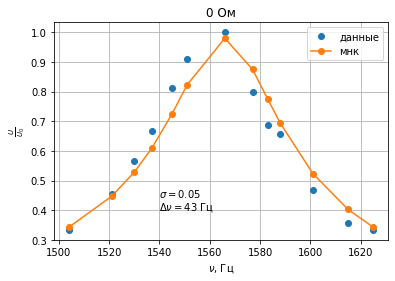

In [99]:
def func(arr, A, C):
    return A / np.sqrt((1566**2 - arr**2)**2 + np.absolute(C) * arr**2)


popt, pcov = curve_fit(func, x, y) 

dispersion = 0

for i in range(len(y)):
    dispersion += (func(x[i], *popt) - y[i]) ** 2
dispersion /= len(y)
dispersion = np.sqrt(dispersion)
print('dispersion = ' + str(dispersion))

plt.plot(x, y, 'o', label='данные')
plt.plot(x, func(x, *popt), '-o', label='мнк') #из МНК
plt.title('0 Ом')
plt.xlabel(r'$\nu$' + ', Гц')
plt.ylabel(r'$\frac{U}{U_0}$')
plt.legend()
plt.grid()
plt.text(1540, 0.4, r'$\sigma = $' + str(int(dispersion * 100)/100) + '\n' + r'$\Delta \nu = $' + str(1587-1544) + ' Гц' )

plt.savefig('plot_0Ohm.png', dpi=300) #Сохраняем график в файл

plt.draw()


obs_vals = scipy.array(y)
exp_vals = scipy.array(func(x, *popt))
chisquare(obs_vals, f_exp=exp_vals)


width = []

for i in range(1500, 1600):
    if func(i, *popt) <= 1/math.sqrt(2)+0.01 and func(i, *popt) >= 1/math.sqrt(2)-0.01:
        width.append(i)
print(width)

for i in range(1544, 1560):
    if func(i, *popt) > func(1544, *popt) + dispersion:
        print('delta Omega = ' + str(i))
        break

dispersion = 0.06370008910956025
[1464, 1465, 1682]


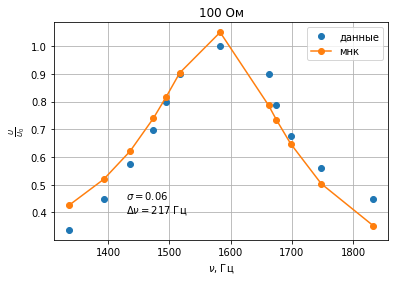

In [100]:
def func(arr, A, C):
    return A / np.sqrt((1583**2 - arr**2)**2 + np.absolute(C) * arr**2)


popt, pcov = curve_fit(func, x1, y1) 

dispersion = 0

for i in range(len(y1)):
    dispersion += (func(x1[i], *popt) - y1[i]) ** 2
dispersion /= len(y1)
dispersion = np.sqrt(dispersion)
print('dispersion = ' + str(dispersion))

plt.plot(x1, y1, 'o', label='данные')
plt.plot(x1, func(x1, *popt), '-o', label='мнк')
plt.title('100 Ом')
plt.legend()
plt.grid()
plt.xlabel(r'$\nu$' + ', Гц')
plt.ylabel(r'$\frac{U}{U_0}$')
plt.text(1430, 0.4, r'$\sigma = $' + str(int(dispersion * 100)/100) + '\n' + r'$\Delta \nu = $' + str(1682-1465) + ' Гц' )

plt.savefig('plot_100Ohm.png', dpi=300) #Сохраняем график в файл

plt.draw()

obs_vals = scipy.array(y1)
exp_vals = scipy.array(func(x1, *popt))
chisquare(obs_vals, f_exp=exp_vals)

width = []

for i in range(1400, 1800):
    if func(i, *popt) <= 1/math.sqrt(2)+0.002 and func(i, *popt) >= 1/math.sqrt(2)-0.002:
        width.append(i)
print(width)